<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Errors_Terra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic a partir de les dues constants anteriors

def normalitza(cos): # Primer passem a m i m/s, després normalitzem
  pos= cos[:3] * 1e3 / r0
  vel= cos[3:] * 1e3 * (t0 / r0)
  return pos, vel

def acceleracions(pos, masses): # pos és matriu N files i 3 columnes
    N= len(masses) # Nombre de planetes
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j:  # Si i ≠ j, perquè un cos no s'atrau a ell mateix
                diff= pos[j] - pos[i]
                d= np.linalg.norm(diff) # Calcula la norma del vector diferència de posicions
                acc[i]= acc[i] + masses[j] * diff / d**3
    return acc
def euler(pos, vel, masses, h):
    acc_euler= acceleracions(pos, masses)
    vel_nou= vel + h * acc_euler
    pos_nou= pos + h * vel
    return pos_nou, vel_nou

def rk4(pos, vel, masses, h):
    K1= vel
    L1= acceleracions(pos, masses)
    K2= vel + 0.5*h*L1
    L2= acceleracions(pos + 0.5*h*K1, masses)
    K3= vel + 0.5*h*L2
    L3= acceleracions(pos + 0.5*h*K2, masses)
    K4= vel + h*L3
    L4= acceleracions(pos + h*K3, masses)
    pos_nou= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nou= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nou, vel_nou


In [47]:
from google.colab import files
import pandas as pd

def error_abs(NASA, analitica):
  """
  NASA: np.array, la solució extreta de la pàgina web
  analitica: np.array, calcul analític amb un mètode numèric
  """
  error = (NASA - analitica)
  return error

uploaded = files.upload()
file_path = '/content/planet_pos.csv'
NASA = np.array([10**3,10**3,10**3])*np.array(pd.read_csv(file_path))


Saving planet_pos.csv to planet_pos (12).csv


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.18335544e+02  3.73536180e+04  1.27397615e+01]
 [ 5.63059189e+02  7.49971472e+04  5.54668682e+01]
 ...
 [ 6.93823545e+09  1.26774048e+09 -1.76092529e+05]
 [ 6.93881979e+09  1.27270510e+09 -1.69904966e+05]
 [ 6.93940034e+09  1.27767114e+09 -1.63732908e+05]]
[np.float64(0.0), np.float64(37353.8076563772), np.float64(74999.2813185841), np.float64(112942.62107110326), np.float64(151189.91238916325), np.float64(189747.12545292705), np.float64(228620.1145329679), np.float64(267814.6174428264), np.float64(307336.2553297418), np.float64(347190.53252529155), np.float64(387382.835964762), np.float64(427918.4356034479), np.float64(468802.4840888158), np.float64(510040.01714943175), np.float64(551635.953199715), np.float64(593595.0942338161), np.float64(635922.1256240252), np.float64(678621.6169855187), np.float64(721698.0218799904), np.float64(765155.6791865074), np.float64(808998.8127235892), np.float64(853231.5328083299), np.float64(897857.

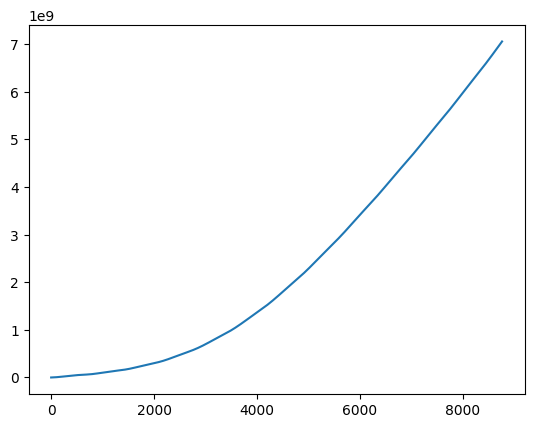

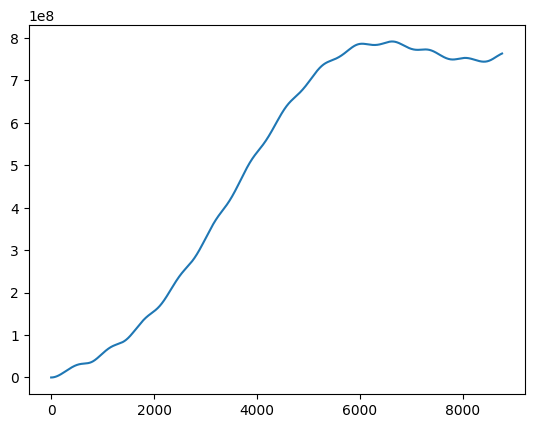

In [60]:
from ast import mod
#Sol i Terra
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])



masses= np.array([m_sol/m0, m_terra/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
posicions= np.array([pos_sol, pos_terra])
velocitats= np.array([vel_sol, vel_terra])

dies= 365
h= 1/24
passos= int(dies/h)
euler_st= np.zeros((passos+1, 2, 3))
rk4_st  = np.zeros((passos+1, 2, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_st[0]= pos_euler
rk4_st[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_st[k+1]= pos_euler
    rk4_st[k+1]  = pos_rk4

#ERROR EULER
#print(NASA)
#print( np.array([r0,r0,r0])*euler_st[:,1,:])
error_e_st = error_abs(NASA, np.array([r0,r0,r0])*euler_st[:,1,:])
print(error_e_st)

mod_error_e_st = []
for i in error_e_st:
  mod_error_e_st.append(np.linalg.norm(i))
print(mod_error_e_st)

plt.plot(np.linspace(0,8760,8761),mod_error_e_st)
plt.show()

#error RK4
error_rk_st = error_abs(NASA, np.array([r0,r0,r0])*rk4_st[:,1,:])
mod_error_rk_st =[]
for i in error_rk_st:
  mod_error_rk_st.append(np.linalg.norm(i))
plt.plot(np.linspace(0,8760,8761),mod_error_rk_st)
plt.show()

In [ ]:
#Sol, Terra i Lluna

#EULER
euler_stl

#RK4
rk_stl

In [ ]:
#Sol, Terra, Lluna i Mart

#EULER
euler_stlm

#RK4
rk4_stlm